In [1]:
""" Set GPU device id
"""
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"


""" Set fix amount of allocation
"""
import tensorflow as tf
# Assume that you have 12GB of GPU memory and want to allocate ~4GB:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
config = tf.ConfigProto(gpu_options=gpu_options)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../')
from datasets import dataset_factory

In [3]:
### Get labelname data

label_filename = '/volSSD/training_data/imagenet64/labels.txt'

df_l = pd.read_table( label_filename, sep=':', header=None )

In [4]:
### Read tfrecord file

DATASET_NAME = 'imagenet64'
DATASET_SPLIT_NAME = 'train'
DATASET_DIR = '/volSSD/training_data/imagenet64'

slim = tf.contrib.slim

NUM_READERS = 4
BATCH_SIZE = 64

### computation graph

tf.reset_default_graph()

dataset = dataset_factory.get_dataset( DATASET_NAME, DATASET_SPLIT_NAME, DATASET_DIR)
provider = slim.dataset_data_provider.DatasetDataProvider(
            dataset,
            num_readers=NUM_READERS,
            common_queue_capacity=20 * BATCH_SIZE,
            common_queue_min=10 * BATCH_SIZE)
[image, label] = provider.get(['image', 'label'])

# Convert images to float32
image = tf.image.convert_image_dtype(image, tf.float32)

# Load the data.
images, labels = tf.train.batch(
                                [image, label],
                                batch_size=BATCH_SIZE,
                                num_threads=4,
                                capacity=5 * BATCH_SIZE)

init = tf.global_variables_initializer()

In [5]:
### Execution

with tf.Session(config=config) as sess:
    
    sess.run(init)
    
    # Create a coordinator and run all QueueRunner objects
    # (MUST include this or the program will hang)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    # get batch data
    img, ll = sess.run([images, labels])

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Run call was cancelled


broom


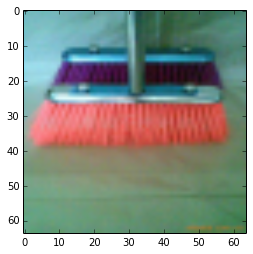

In [6]:
import random

random_idx = random.randint(0, BATCH_SIZE-1)

print df_l.iloc[ ll[random_idx] ][1]
plt.imshow(img[random_idx])